In [1]:
import sys
sys.path.append("..")
from galpy.potential import MiyamotoNagaiPotential, NFWPotential, HernquistPotential
from galpy.actionAngle import estimateDeltaStaeckel, actionAngleStaeckel
from galpy.actionAngle import UnboundError

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *
from auriga_functions import *

import numpy as np
from scipy import stats
from IPython.display import Image, display

import corner

import datetime
import random

import copy

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Circle
from matplotlib import animation
from matplotlib.colors import LogNorm
from matplotlib import rcParams

import datetime
%matplotlib inline

rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 1.5
rcParams['axes.linewidth'] = 1.5
rcParams['ytick.major.width'] = 1.5
rcParams['xtick.major.width'] = 1.5
rcParams['image.cmap'] = 'magma'
rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.format'] = 'png'

cmap = copy.copy(plt.cm.get_cmap(rcParams['image.cmap']))
cmap.set_bad((0,0,0))
%config InlineBackend.figure_format = 'retina'


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
machine = 'mac'
#machine = 'magny'
machine = 'virgo'

if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
    filedir = "/home/extmilan/masterthesis/files/"
    plotdir = "/home/extmilan/masterthesis/plots/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
    filedir = "/Users/smilanov/Documents/masterthesis/auriga_files/files/"
    plotdir = "/Users/smilanov/Documents/masterthesis/auriga_files/plots/"
elif machine == 'virgo': 
    basedir = "/virgo/simulations/Auriga/level4_MHD/"
    filedir = "/u/milas/masterthesis/masterproject/files/"
    plotdir = "/u/milas/masterthesis/masterproject/plots/"
   


In [3]:
mergersnap, R0_kpc_mean, v0_kms_mean, a_MND_kpc_mean, b_MND_kpc_mean, a_HB_kpc_mean, a_NFWH_kpc_mean, v0_MND_kms_mean, v0_HB_kms_mean, v0_NFWH_kms_mean, n_NFWH_mean, n_HB_mean, n_MND_mean= np.loadtxt(filedir + 'potential/potential_params_dec18/mean_pot_params.txt') 


In [4]:
def setup_galpy_potential(a_MND_kpc, b_MND_kpc, a_NFWH_kpc, a_HB_kpc, n_MND, n_NFWH, n_HB, _REFR0_kpc):
    
    #test input:
    if (a_MND_kpc <= 0.) or (b_MND_kpc <= 0.) or (a_NFWH_kpc <= 0.) or (a_HB_kpc <= 0.) \
       or (n_MND <= 0.) or (n_NFWH <= 0.) or (n_HB <= 0.) or (n_MND >= 1.) or (n_NFWH >= 1.) or (n_HB >= 1.):
        raise ValueError('Error in setup_galpy_potential: '+\
                         'The input parameters for the scaling profiles do not correspond to a physical potential.')
    if np.fabs(n_MND + n_NFWH + n_HB - 1.) > 2e-2:
        raise ValueError('Error in setup_galpy_potential: '+\
                         'The sum of the normalization does not add up to 1.')
        
    #trafo to galpy units:
    a_MND  = a_MND_kpc  / _REFR0_kpc
    b_MND  = b_MND_kpc  / _REFR0_kpc
    a_NFWH = a_NFWH_kpc / _REFR0_kpc
    a_HB   = a_HB_kpc   / _REFR0_kpc
    
    #setup potential:
    disk = MiyamotoNagaiPotential(
                a = a_MND,
                b = b_MND,
                normalize = n_MND)
    halo = NFWPotential(
                a = a_NFWH,
                normalize = n_NFWH)
    bulge = HernquistPotential(
                a = a_HB,
                normalize = n_HB) 
     
    return [disk,halo,bulge]

In [5]:
mergersnap

108.0

level   : 4
halo    : 24
snapnr  : 127
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1783163 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]

Number of GCs: 24793.
22:25:07.379904
0
11:22:47.398822
16000
11:25:16.208688
17000
11:27:42.247122
18000
11:30:05.352186
19000
11:32:30.877609
20000
11:34:55.090916
21000
11:37:17.996508
22000
11:39:44.662793
23000
11:42:11.935019
24000
Number of GCs w/o actions: 0


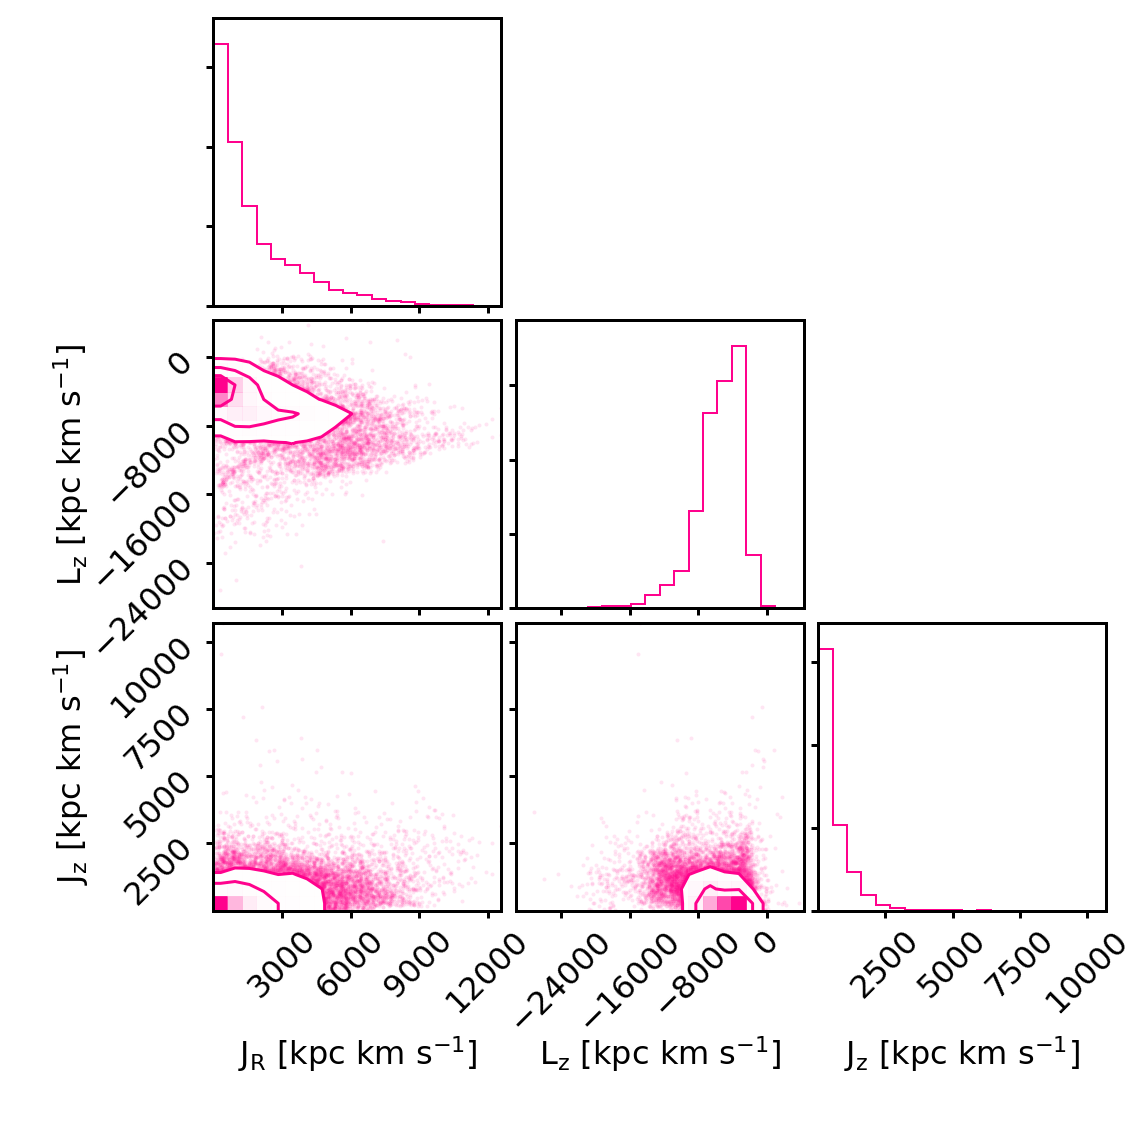

level   : 4
halo    : 24
snapnr  : 114
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1680675 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02292117774486542
redshift: 0.1692520332436107
time    : 0.8552476040823377
center  : [ 0.  0.  0.]

Number of GCs: 24793.
11:44:54.297911
0
11:47:18.797161
1000
11:49:46.021512
2000
11:52:14.349387
3000
11:54:40.433752
4000
11:57:05.147229
5000
11:59:32.595227
6000
12:01:57.780710
7000
13:11:59.550015
11000
13:14:25.277575
12000
13:16:52.025116
13000
13:19:17.098466
14000
13:21:51.004814
15000
13:24:38.056760
16000
13:27:08.091943
17000
13:29:35.614045
18000
13:32:02.103214
19000
13:34:28.382622
20000
13:36:53.740664
21000
13:39:21.273287
22000
13:41:45.943542
23000
13:44:11.559542
24000
Number of GCs w/o actions: 0


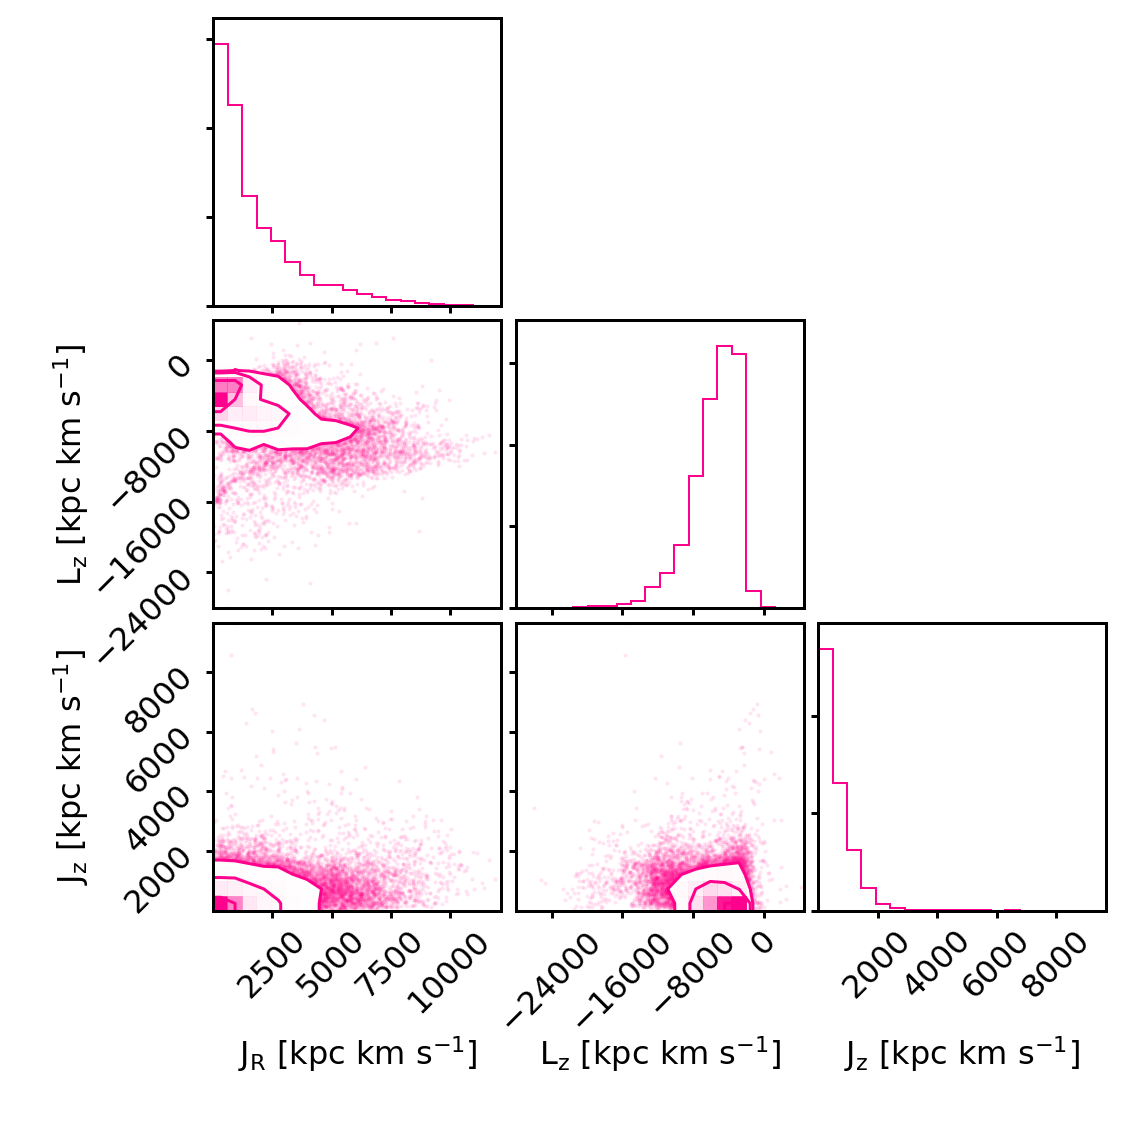

level   : 4
halo    : 24
snapnr  : 112
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1681756 stars.
Rotated pos.
Rotated vel.

galrad  : 0.022649659216403963
redshift: 0.19728418237600986
time    : 0.8352235958012078
center  : [ 0.  0.  0.]

Number of GCs: 24793.
13:46:46.730666
0
13:49:12.078128
1000
13:51:37.215994
2000
13:54:03.292078
3000
13:56:28.893920
4000


In [ ]:
level = 4

startnr = 108
endnr   = 128

colors = ['black', 'black', 'xkcd:hot pink', 'xkcd:indigo blue', 'xkcd:saffron']

pot_galpy = setup_galpy_potential(a_MND_kpc_mean, b_MND_kpc_mean, a_NFWH_kpc_mean, a_HB_kpc_mean, n_MND_mean, n_NFWH_mean, n_HB_mean, R0_kpc_mean)
fix_v0_kms = v0_kms_mean
fix_R0_kpc = R0_kpc_mean

for prognr in [2]: #2, 3, 4
    IDs = np.loadtxt(filedir + 'auriga/surviving_GC_wodisk_IDs_prog{}.txt'.format(prognr))
    progcolor = colors[prognr]
    
    for halo_number in [24]:  # range(1, 31):
        halodir = basedir+"halo_{0}/".format(halo_number)
        snappath = halodir+"output/"

        for snapnr in range(endnr-1, startnr-1, -1):
            i = snapnr - startnr
            print("level   : {0}".format(level))
            print("halo    : {0}".format(halo_number))
            print("snapnr  : {0}".format(snapnr))
            print("basedir : {0}".format(basedir))
            print("halodir : {0}".format(halodir))
            print("snappath: {0}\n".format(snappath))
            s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[4], 
                haloid=0, galradfac=0.1, verbose=True) 

            # Clean negative and zero values of gmet to avoid RuntimeErrors
            # later on (e.g. dividing by zero)
            s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )

            gcmask = np.isin(s.id, IDs)
            print('Number of GCs: {}.'.format(np.sum(gcmask)))

            #print('Sum of normalizations after fitting potential parameters: {}.'.format(np.sum([n_MND[i], n_NFWH[i], n_HB[i]])))


            # this would mean that there are no merged GCs
            if np.sum(gcmask) == 0:
                print("Skipped snap {} since there are no merged GCs.".format(snapnr))
                #continue


            # get position and velocities of all selected GCs & convert to galpy units
            (R_kpc, phi_rad, z_kpc), (vR_kms, vphi_kms, vz_kms) = get_cylindrical_vectors(s, sf, gcmask)
            # convert physical to galpy units by dividing by REF vals (get velocities from best fit parameters)
            R_galpy, vR_galpy, vT_galpy, z_galpy, vz_galpy = R_kpc / fix_R0_kpc, vR_kms / fix_v0_kms, vphi_kms / fix_v0_kms, z_kpc / fix_R0_kpc, vz_kms / fix_v0_kms

            # estimate Delta of the Staeckel potential
            delta = 0.45
            delta = estimateDeltaStaeckel(pot_galpy, R_galpy, z_galpy)
            # CHECK HOW BIG INFLUENCE OF DELTA IS


            # set up the actionAngleStaeckel object
            aAS = actionAngleStaeckel(
                    pot   = pot_galpy,  # potential
                    delta = delta,      # focal length of confocal coordinate system
                    c     = True        # use C code (for speed)
                    )

            jR_galpy, lz_galpy, jz_galpy, r_kpc = np.zeros(len(IDs)), np.zeros(len(IDs)), np.zeros(len(IDs)), np.zeros(len(IDs))
            savedIDs = np.zeros(len(IDs))
            IDs_notworking = []
            for test_i, item in enumerate(IDs):
                if (test_i % 1000) == 0:
                    print(datetime.datetime.now().time())
                    print(test_i)
                try: 
                    jR_galpy[test_i], lz_galpy[test_i], jz_galpy[test_i] = aAS(R_galpy[test_i], vR_galpy[test_i], vT_galpy[test_i], z_galpy[test_i], vz_galpy[test_i])
                    r_kpc[test_i] = np.sqrt(R_kpc[test_i]**2 + z_kpc[test_i]**2)
                    savedIDs[test_i] = item
                except(ValueError, UnboundError):
                    IDs_notworking.append(item)
                    continue

            print('Number of GCs w/o actions:', len(IDs_notworking))
            jR_kpckms, lz_kpckms, jz_kpckms = jR_galpy * fix_R0_kpc * fix_v0_kms, lz_galpy * fix_R0_kpc * fix_v0_kms, jz_galpy * fix_R0_kpc * fix_v0_kms

            # just pick result values of particles of which I actually could calculate actions
            survivor_id_mask = np.isin(IDs, savedIDs)
            survivor_IDs = IDs[survivor_id_mask]
            jR_kpckms, lz_kpckms, jz_kpckms = jR_kpckms[survivor_id_mask], lz_kpckms[survivor_id_mask], jz_kpckms[survivor_id_mask]
            r_kpc = r_kpc[survivor_id_mask]

            save_data = ([survivor_IDs, r_kpc, jR_kpckms, lz_kpckms, jz_kpckms])
            np.savetxt(filedir + 'actions/averaged_potential/progenitor{}/gcwodisk_actions_snap_{}_jan19.txt'.format(prognr,snapnr), save_data)

            data = np.vstack([jR_kpckms, lz_kpckms, jz_kpckms])

            '''if prognr == 2:
                actionrange = np.array([[0, 10000], [-25000,0], [0,2000]])
            else:''' 
            actionrange = None
            #print(actionrange)
            labels = ['\nJ$_\mathrm{R}$ [kpc km s$^{-1}$]\n', '\nL$_\mathrm{z}$ [kpc km s$^{-1}$]\n', '\nJ$_\mathrm{z}$ [kpc km s$^{-1}$]\n']
            figure = corner.corner(data.transpose(), labels = labels, plot_contours = 1, color = progcolor, range = actionrange, bbox_inches = 'tight')#, range =  [(0.,7500.), (-10000.,10000.),(0., 4000.)])
            figure.savefig(plotdir + 'actions/averaged_potential/progenitor{}/gcwodisk_actions_snap_{}.png'.format(prognr, snapnr))
            plt.show()